# Interactive GUI demo

This is a simple demo file to show how to create an interactive activity with matplotlib. I hope that you may have a chance to read through it quickly and make sure that the module at the end works on your system.

There is no need to try to understand everything, because we will walk through this example and another during the clinic. 

__If the module does not work on your computer, please let me know!__

In this little toy example of a module, let's imagine that we are trying to teach a group of young students how the slope of a line affects the position of that line in cartesian coordinates.

So, we will set up a _plot_ with a line, and a _slider_ that controls that slope of that line. Every time the student changes the slider, we want them to be able to see how that impacts the position of that line on the graph.

## Import libraries and set up parameters

We will use a plotting library for Python called `matplotlib` as the backend for our interactive slope module. Matplotlib provides a set of interactive objects called _widgets_ (buttons, sliders, etc.) which we will rely on. The `import ___ as ___` calls I use here are pretty conventional, so I recommend using them. This provides a convenient way to access the various parts of Matplotlib, and keep our namespace clean.

To set up our line we will define some variables to use in computations: slope, intercept, x-values, and y-values.

In [1]:
%matplotlib notebook

# This is a module to demonstrate how a model is implemented in interactive matplotlib
# The module is written in Python3, and can be executed as a stand-alone script or in this jupyter notebook.


# IMPORT LIBLARIES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.widgets as widget


# SET PARAMETERS
m = 1                                               # line slope
b = 0                                               # line intercept
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])    # line x-values
y = (m * x) + b                                     # line y-values

# set limits to the slider
mMax = 3 # maximum line slope value we will allow
mMin = 0 # minimum


## A note on functional vs. object-oriented programming
Python and matplotlib are designed to be object-oriented programming (OOP) languages. This differs from functional programming (FP, which is more common for scientists), and it is important to understand this approach in creating these modules. FP relies on functions which take "data" as an argument, and manipulate the data to return the modified data as a new set of data, for example:
```
z = [1,2,3]
z_sum = sum(xz)

z_sum
    6
```
OOP relies on objects which themselves _are_ the data, and have their own _methods_ to manipulate themselves directly, for example:
```
z = vector([1,2,3])
z.sum()
    6
```

This distinction may seem subtle, but it is important for creating these modules. The reason is that if we adhere to a FP approach, then we would create a new version of the "data" every time we want to update the plot in the module. Applied to our example of a sloping line, we don't want to create a new `x` and `y` and new line in the plot every time we update; instead, we want to change the values of the data (i.e., the values of the object) using the methods provided to us by OOP. Creating new lines every time would 1) clutter the plot and make it hard to read, and 2) take up more and more computer memory.

In the example above, `z` is called an _instance_ of the _class_ `vector`, and we are calling its _method_ `sum`. These terms will be useful when discussing the creation of a module. In matplotlib parlance, the _figure_ refers to the overall object, and the _axes_ refers to the items within that figure. Examples of axes could be a plot with lines, or a slider. 

## Creating the figure
We will create an _instance_ of the _class_ `Figure` as `fig`, and an _instance_ of the _class_ `Axes` as `ax`.  

<IPython.core.display.Javascript object>


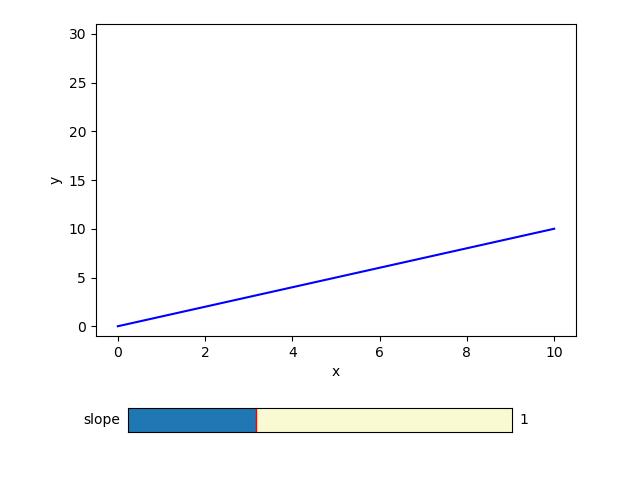

(-1, 31)

In [2]:
# setup the figure
fig = plt.figure() # figure() returns an instance of the Figure object
ax = fig.add_subplot(1,1,1) # add an axis, subplots with one row, one column, first plot
fig.subplots_adjust(left=0.15, bottom=0.3, top=0.95, right=0.9) # where do we want the limits of the axes object

# set the labels and limits
ax.set_xlabel("x") # the axis xlabel
ax.set_ylabel("y") # the axis ylabel
ax.set_ylim(-1, 31) # the axis y limits

Now, we will add a line to the _instance_ `ax` (of _class_ `Axes`) with the _method_ called `plot`. `plot` takes two vectors of the same length as x-values and y-values and plots them against one another, and it returns an _instance_ of the _class_ `Line2D` which we name `theline`. 

In [3]:
# add plot elements
theline, = ax.plot(x, y, lw=1.5, color='blue')

Optionally you can pass appearance commands to `plot` which control the line width (`lw`) or line color (`color`) or [many other options](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D). These appearance options can always be changed later with _methods_ of the object `theline`. For example, `theline.set_color('red')` would make the line red. 

This object-oriented approach is really powerful for changing the appearance of objects in your module based on conditionals.
For example, if a checkbox is checked do something, or if a river is flooding change the color to red, or if a hillslope is some angle make it a dashed line,  or if a deposit was made by crevasse splay color it orange, etc.

To create the slider, we will follow a similar approach: first creating an _instance_ of `Axes` called `slider_ax`, and then creating an _instance_ of the `Slider` _class_ called `slide`, which occupies the space of `slide_ax`. The arguments passed to `widget.Slider()` in creating the instance are explained on the [manual page for `Slider`.](https://matplotlib.org/api/widgets_api.html#matplotlib.widgets.Slider).

In [4]:
# add slider
widget_color = 'lightgoldenrodyellow'

slide_ax = plt.axes([0.2, 0.1, 0.6, 0.05], facecolor=widget_color)
slide = widget.Slider(slide_ax, 'slope', mMin, mMax, 
                               valinit=m, valstep=0.1, 
                               valfmt='%g', transform=ax.transAxes)

After executing all the above code, you should have a plot and slider in the above figure we created. If you try to interact with the slider above now, you should be able to change the value of the slider, but you'll notice it has no effect on the position of the line.

## The update function

Now we must define a routine which will be called every time we need to update the plot. Eventually we will create the slider and hook this function into the slider, so that it is called every time the slider is changed.

In [5]:
# DEFINE FUNCTIONS
def update(event):
    """
    This function is the main function we will call each time the slider is changed, to update the plot.
    """
    # read values from the slider
    them = slide.val 

    # compute new y values
    they = (them * x) + b

    # update the plot
    theline.set_ydata(they)

    # redraw the canvas
    fig.canvas.draw_idle()

`slide.val` accesses the _attribute_ of the `slide` object. Recall that `slide` is an _instance_ of the _class_ `Slider`, which has an attribute called `val`, as well as _methods_ `set_val(  )` and `reset()`.

Our updating function then computes new `y` values for the line, which we then use a _method_ of our line _instance_ to update the y-values of the line in the plot. We then simply call a routine to redraw the plot.

A side note: the variable `event` in the `update` function will have the value of the slider when the function is called, we could simply use this in place of `them`, but I prefer to explicitly access the value of the slider because I find it more readable and flexible. For example, your updating function may need to know the value of additional sliders other than just the one which is currently being changed. 

## Connecting the slider

But still, our slider will not do anything to update the plot. We still have to connect the slider to the update function. To do this, we take advantage of `slide`'s `on_changed` _method_. We supply the name of the function `update` to `on_changed`, so that this function is executed each time `slide` is changed.

In [6]:
# connect widgets
slide.on_changed(update)

0

Finally, we will put the plot up for the user. This is only necessary if your module is running as a script (i.e., not in a jupyter notebook), but it doesn't hurt anything to run it here.

In [7]:
# show the results
plt.show()

Now scroll back up to the figure and see that everything is working!